In [1]:
# importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import pickle

In [3]:
# importing the dataset
df = pd.read_csv(r"E:\PROJECT\Diamond_Price_Prediction_Project\data\diamonds.csv")

In [4]:
# checking the dataset
df.head(2)

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN


In [5]:
# checking shape of dataset
df.shape

(6485, 18)

In [6]:
# checking statistical data
df.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


In [7]:
# checking if duplicates are present
df.duplicated().sum()

3

In [8]:
# removing the duplicates 
df.drop_duplicates(inplace = True)

In [9]:
# creating new dataset with required columns
df= df[['Carat Weight', 'Clarity', 'Color', 'Depth %', 'Table %', 'Polish', 'Symmetry', 'Type', 'Shape', 'Price']]

In [10]:
# checking if the dataset has null values
df.isnull().sum()

Carat Weight     5
Clarity          5
Color            5
Depth %          7
Table %         17
Polish          20
Symmetry        20
Type             0
Shape            5
Price            0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
# checking all required information about the dataset
df.head()

,Carat Weight,Clarity,Color,Depth %,Table %,Polish,Symmetry,Type,Shape,Price
0,1.84,VVS2,F,65.8,59.0,Excellent,Very Good,GIA Lab-Grown,Cushion Modified,2640
1,1.20,VS1,E,62.5,58.0,Very Good,Very Good,GIA Lab-Grown,Pear,1070
2,1.19,VS1,E,63.1,63.0,Very Good,Very Good,GIA Lab-Grown,Oval,1070
3,1.00,IF,D,61.7,58.0,Excellent,Excellent,GIA,Heart,7110
4,1.01,VS1,H,69.4,66.0,Excellent,Very Good,GIA,Radiant,3050


## ----------EDA


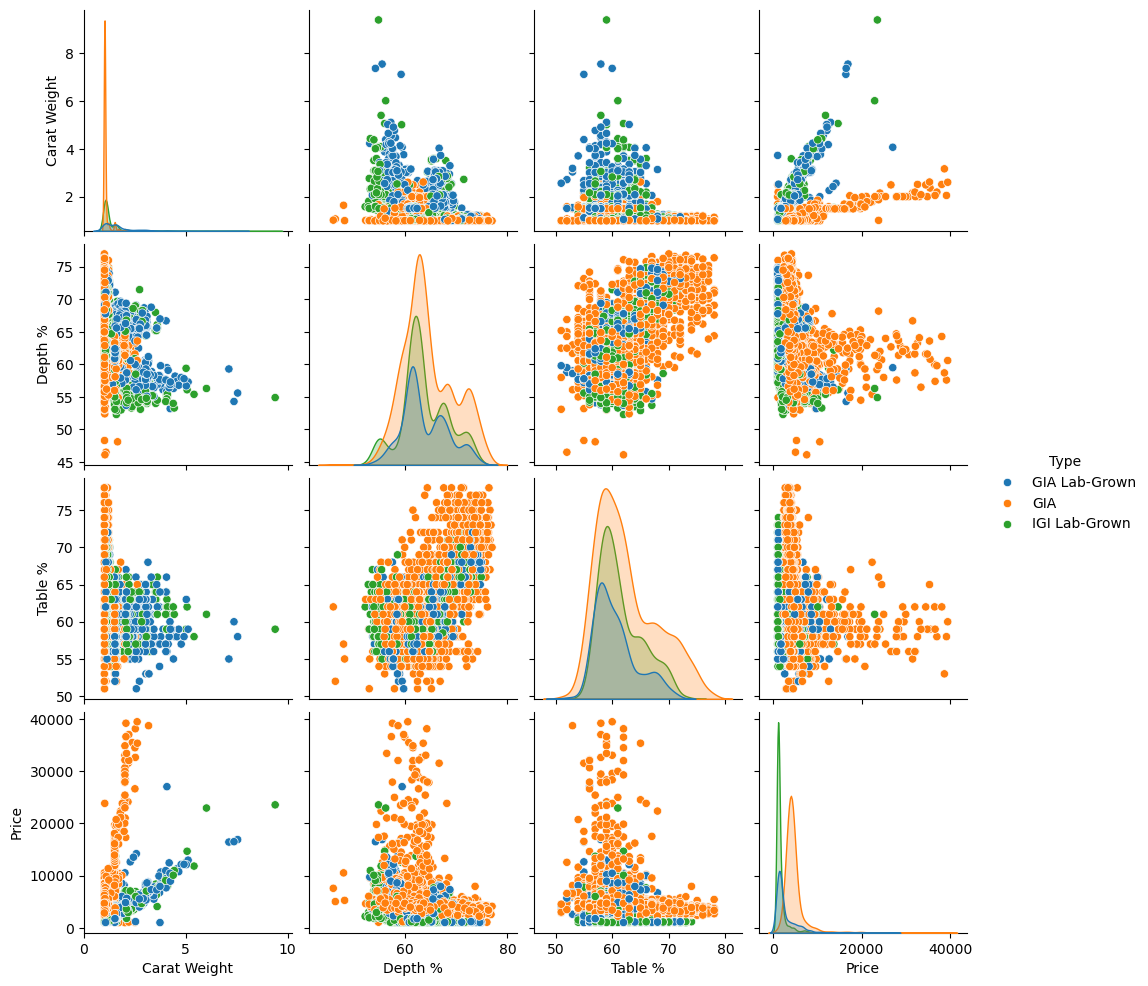

In [12]:
# relation between table%, depth%, polish, symmetry with price

sns.pairplot(df, hue= 'Type')

<Axes: xlabel='Depth %', ylabel='Table %'>

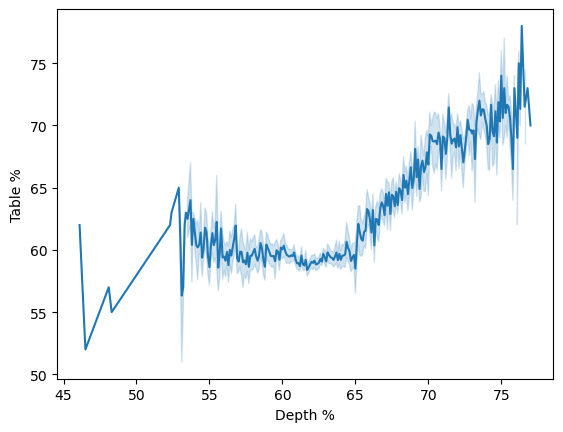

In [13]:
# relationship between Depth % and Tavle %

sns.lineplot(df, x='Depth %', y='Table %')

<Axes: xlabel='Color', ylabel='Price'>

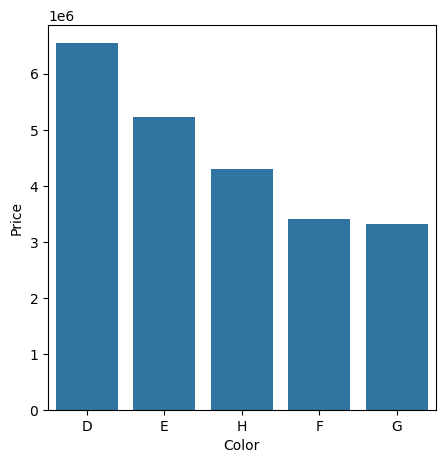

In [14]:
# relationship between color and price

plt.figure(figsize=(5,5))

color_price = df.groupby(['Color'], as_index = False)['Price'].sum().sort_values(by = ['Price'], ascending = False)
sns.barplot(color_price, x= 'Color',y= 'Price')

<Axes: xlabel='Clarity', ylabel='Price'>

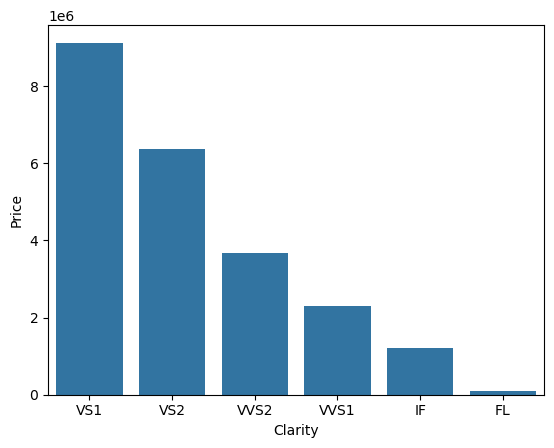

In [15]:
# relationship between clarity and price

clarity_price = df.groupby(['Clarity'], as_index = False)['Price'].sum().sort_values(by = ['Price'], ascending = False)
sns.barplot(clarity_price, x= 'Clarity',y= 'Price')

<Axes: xlabel='Shape', ylabel='Price'>

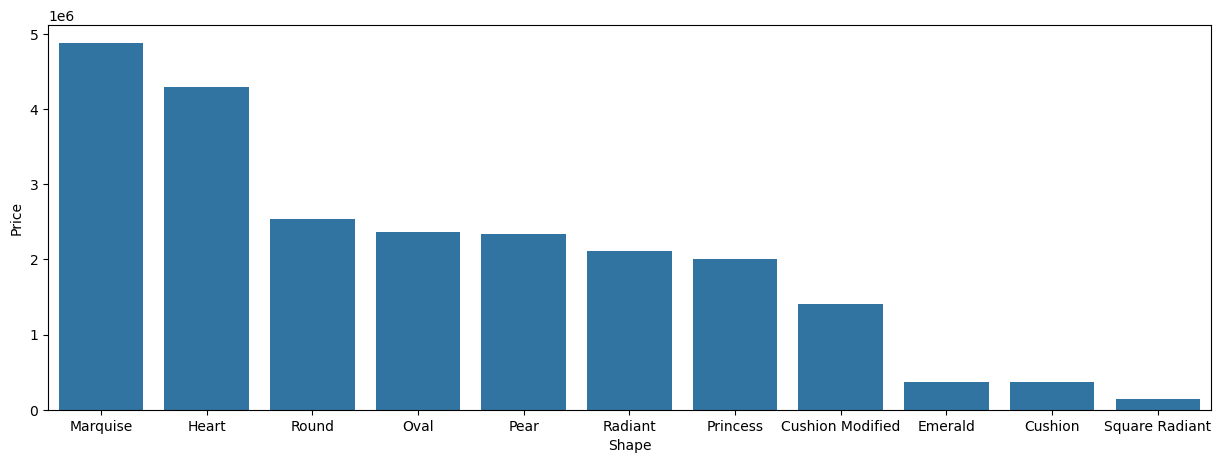

In [16]:
# relationship between shape and price

plt.figure(figsize=(15,5))

shape_price = df.groupby(['Shape'], as_index = False)['Price'].sum().sort_values(by = ['Price'], ascending = False)
sns.barplot(x = 'Shape', y = 'Price', data = shape_price)

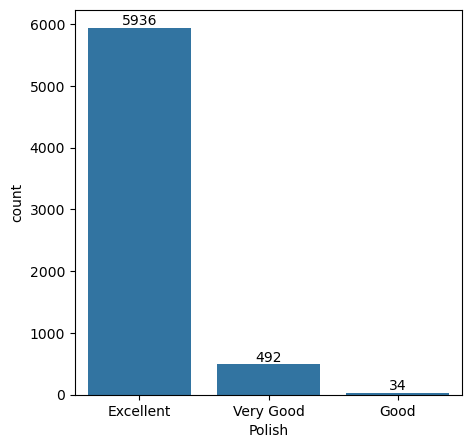

In [17]:
# relationship between polish and price

plt.figure(figsize=(5,5))
polish = sns.countplot(x = 'Polish', data= df)

for bars in polish.containers:
    polish.bar_label(bars)

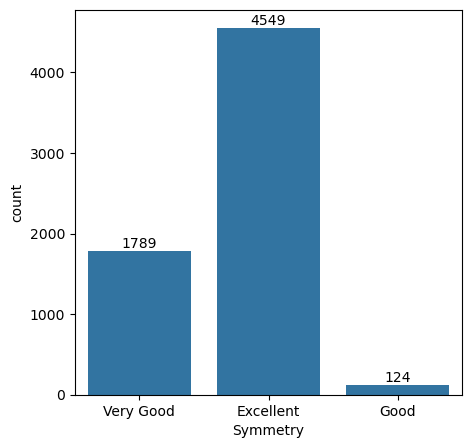

In [18]:
# relationship between Symmetry and price

plt.figure(figsize=(5,5))
summetry = sns.countplot(x = 'Symmetry', data= df)

for bars in summetry.containers:
    summetry.bar_label(bars)

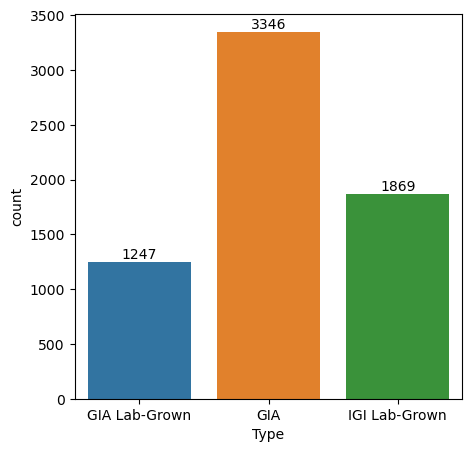

In [19]:
# relationship between type and price
plt.figure(figsize=(5,5))
type = sns.countplot(x = 'Type', data = df, hue = 'Type')

for bars in type.containers:
    type.bar_label(bars)

In [20]:
df.shape

(6462, 10)

## ----------Outlier detection for carat weight and price

In [21]:
# Outlier detection for carat weight

<Axes: xlabel='Price', ylabel='Density'>

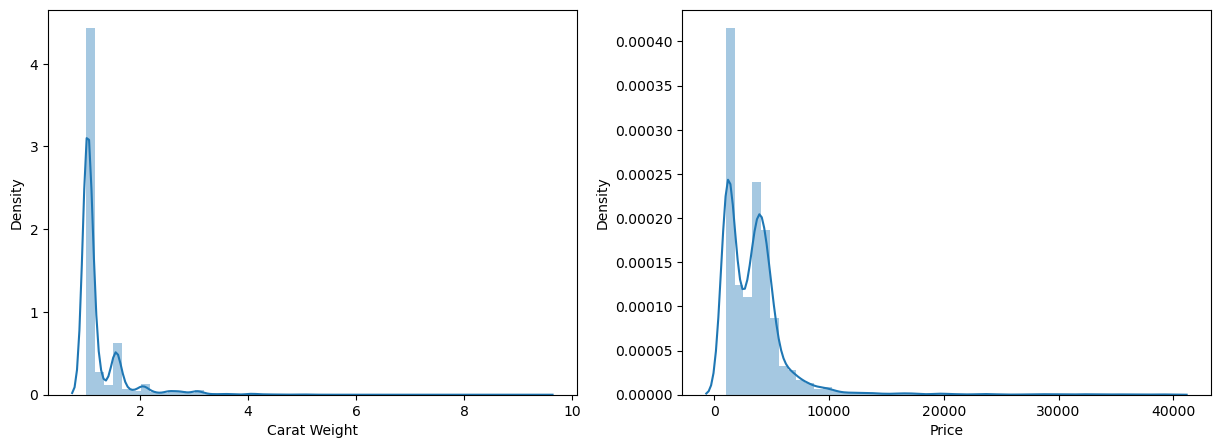

In [22]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['Carat Weight'])

plt.subplot(1,2,2)
sns.distplot(df['Price'])

<Axes: ylabel='Carat Weight'>

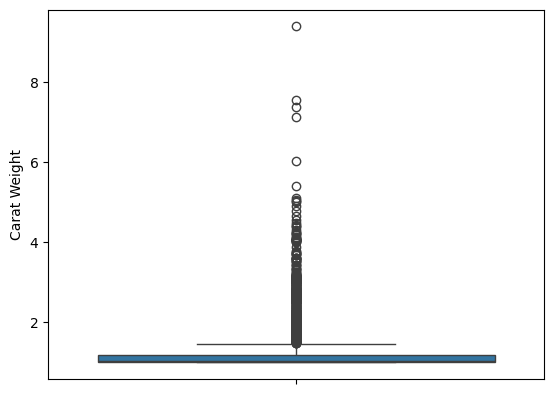

In [23]:
sns.boxplot(df['Carat Weight'])

In [24]:
df['Carat Weight'].describe()

count    6462.000000
mean        1.234500
std         0.505277
min         1.000000
25%         1.010000
50%         1.030000
75%         1.190000
max         9.380000
Name: Carat Weight, dtype: float64

In [25]:
carat_lower_limit = df['Carat Weight'].quantile(0.2)

In [26]:
carat_lower_limit

1.0

In [27]:
carat_upper_limit = df['Carat Weight'].quantile(0.8)

In [28]:
carat_upper_limit

1.5

In [29]:
carat_new_df = df[(df['Carat Weight'] <= 1.5) & (df['Carat Weight'] >= 1)]

In [30]:
carat_new_df.head(2)

,Carat Weight,Clarity,Color,Depth %,Table %,Polish,Symmetry,Type,Shape,Price
1,1.20,VS1,E,62.5,58.0,Very Good,Very Good,GIA Lab-Grown,Pear,1070
2,1.19,VS1,E,63.1,63.0,Very Good,Very Good,GIA Lab-Grown,Oval,1070


In [31]:
carat_new_df['Carat Weight'].describe()

count    5218.000000
mean        1.051177
std         0.087880
min         1.000000
25%         1.000000
50%         1.020000
75%         1.060000
max         1.500000
Name: Carat Weight, dtype: float64

<Axes: ylabel='Carat Weight'>

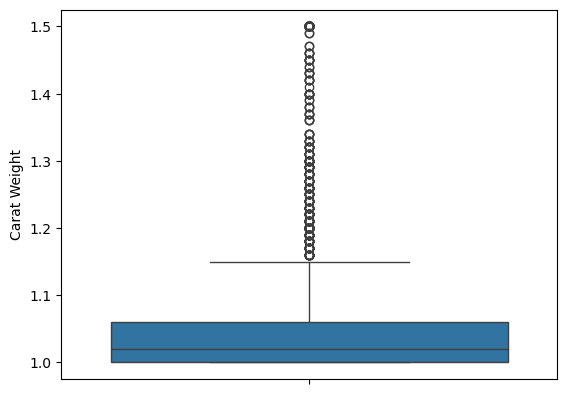

In [32]:
sns.boxplot(carat_new_df['Carat Weight'])

In [33]:
# Outlier detection for price

In [34]:
df['Price'].describe()

count     6462.000000
mean      3526.843547
std       3275.983124
min       1010.000000
25%       1210.000000
50%       3320.000000
75%       4390.000000
max      39460.000000
Name: Price, dtype: float64

In [35]:
price_lower_limit = df['Price'].quantile(0.1)

In [36]:
price_lower_limit

1070.0

In [37]:
price_upper_limit = df['Price'].quantile(0.98)

In [38]:
price_upper_limit

11568.999999999987

In [39]:
price_new_df = df[df['Price'] <= 11568]

In [40]:
price_new_df.Price.describe()

count     6332.000000
mean      3181.057012
std       1943.189487
min       1010.000000
25%       1210.000000
50%       3240.000000
75%       4310.000000
max      11530.000000
Name: Price, dtype: float64

<Axes: ylabel='Price'>

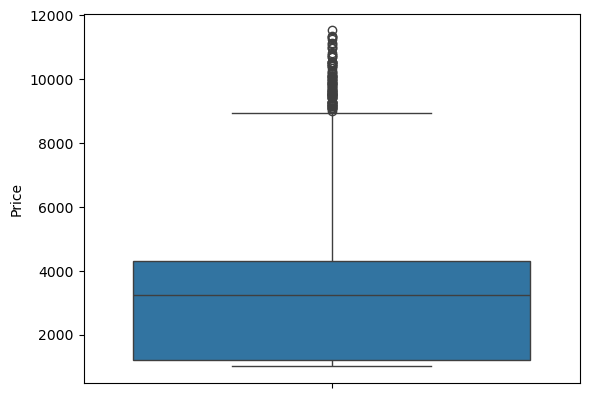

In [41]:
sns.boxplot(price_new_df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

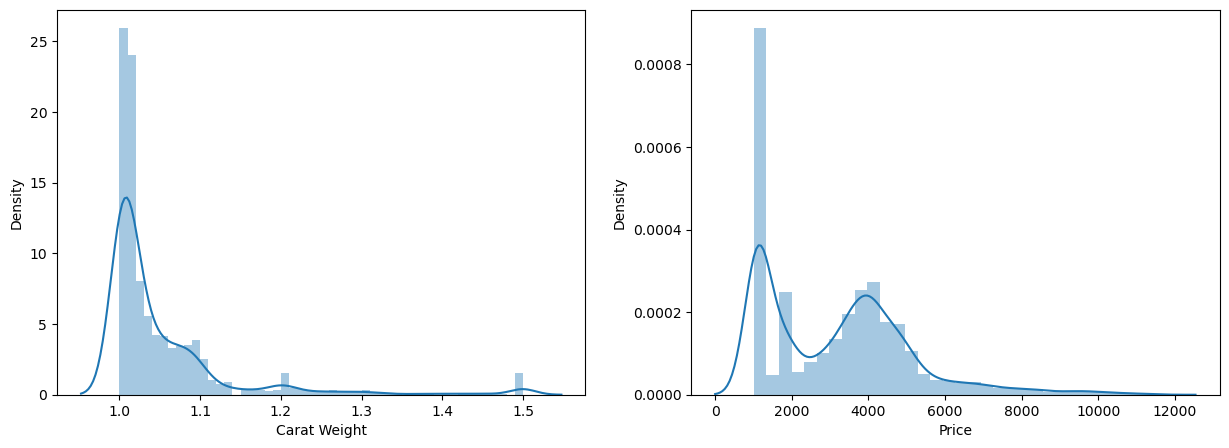

In [42]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(carat_new_df['Carat Weight'])

plt.subplot(1,2,2)
sns.distplot(price_new_df['Price'])

### Outlier detection and removal for depth % and table %

<Axes: xlabel='Table %', ylabel='Density'>

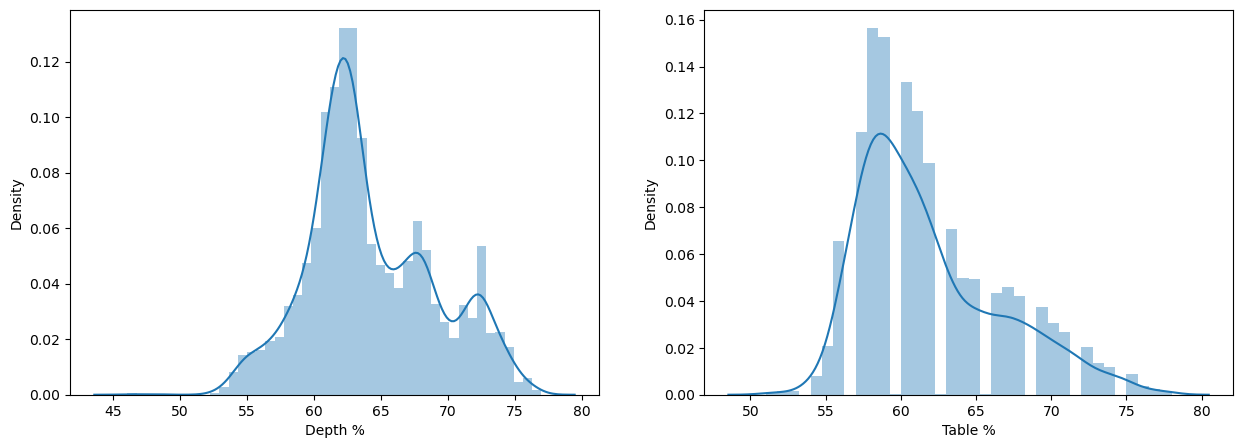

In [43]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['Depth %'])

plt.subplot(1,2,2)
sns.distplot(df['Table %'])

#### Outlier detection and removal for depth %

<Axes: ylabel='Depth %'>

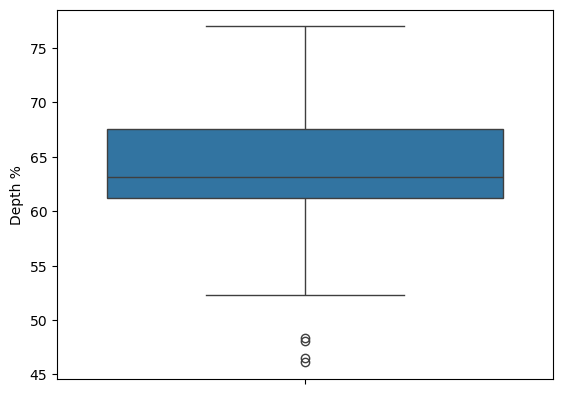

In [44]:
sns.boxplot(df['Depth %'])

In [45]:
df['Depth %'].describe()

count    6462.000000
mean       64.209734
std         4.774455
min        46.100000
25%        61.200000
50%        63.100000
75%        67.600000
max        77.000000
Name: Depth %, dtype: float64

In [46]:
percentile25 = df['Depth %'] .quantile(0.25)
percentile75 = df['Depth %'] .quantile(0.75)

In [47]:
percentile25

61.2

In [48]:
percentile75

67.6

In [49]:
iqr = percentile75 - percentile25

In [50]:
depth_upper_limit = percentile75 + 1.5 * iqr
depth_lower_limit = percentile25 - 1.5 * iqr

In [51]:
depth_upper_limit

77.19999999999999

In [52]:
depth_lower_limit

51.600000000000016

In [53]:
depth_new_df = df[df['Depth %'] >= depth_lower_limit]

In [54]:
depth_new_df.head(2)

,Carat Weight,Clarity,Color,Depth %,Table %,Polish,Symmetry,Type,Shape,Price
0,1.84,VVS2,F,65.8,59.0,Excellent,Very Good,GIA Lab-Grown,Cushion Modified,2640
1,1.20,VS1,E,62.5,58.0,Very Good,Very Good,GIA Lab-Grown,Pear,1070


<Axes: ylabel='Depth %'>

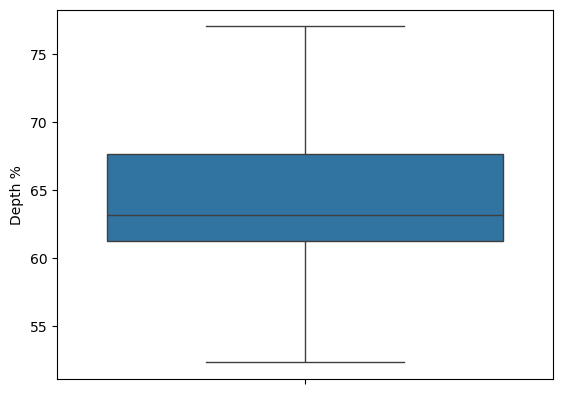

In [55]:
sns.boxplot(depth_new_df['Depth %'])

## ----------capping 

In [56]:
# for Carat Weight
df['Carat Weight'] = np.where(df['Carat Weight'] >= carat_upper_limit,
        carat_upper_limit,
        np.where(df['Carat Weight'] <= carat_lower_limit,
        carat_lower_limit,
                df['Carat Weight']))

In [57]:
df['Carat Weight'].describe()

count    6462.000000
mean        1.137580
std         0.193791
min         1.000000
25%         1.010000
50%         1.030000
75%         1.190000
max         1.500000
Name: Carat Weight, dtype: float64

In [58]:
# for Price
df['Price'] = np.where(df['Price'] >= price_upper_limit,
        price_upper_limit,
                df['Price'])

In [59]:
df.Price.describe()

count     6462.000000
mean      3349.802383
std       2255.476898
min       1010.000000
25%       1210.000000
50%       3320.000000
75%       4390.000000
max      11569.000000
Name: Price, dtype: float64

In [60]:
# for Depth %
df['Depth %'] = np.where(df['Depth %'] <= depth_lower_limit,
        depth_lower_limit,
                df['Depth %'])

In [61]:
df['Depth %'].describe()

count    6462.000000
mean       64.212426
std         4.766048
min        51.600000
25%        61.200000
50%        63.100000
75%        67.600000
max        77.000000
Name: Depth %, dtype: float64

In [62]:
df.shape

(6462, 10)

In [63]:
df.Color.value_counts()

Color
E    1880
D    1763
H    1116
F     967
G     736
Name: count, dtype: int64

In [64]:
# df['Color'] = df.Color.map({'D':1, 'E':2, 'F':3, 'G':4, 'H':5})

## ---------- Preparing X and y variables

In [65]:
X = df.drop(columns= ['Price'], axis=1)

In [66]:
X.head()

,Carat Weight,Clarity,Color,Depth %,Table %,Polish,Symmetry,Type,Shape
0,1.50,VVS2,F,65.8,59.0,Excellent,Very Good,GIA Lab-Grown,Cushion Modified
1,1.20,VS1,E,62.5,58.0,Very Good,Very Good,GIA Lab-Grown,Pear
2,1.19,VS1,E,63.1,63.0,Very Good,Very Good,GIA Lab-Grown,Oval
3,1.00,IF,D,61.7,58.0,Excellent,Excellent,GIA,Heart
4,1.01,VS1,H,69.4,66.0,Excellent,Very Good,GIA,Radiant


In [67]:
y = df['Price']

## ----------columnTransformer

In [68]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [69]:
X = preprocessor.fit_transform(X)

In [70]:
X.shape

(6462, 34)

## ----------Model training

In [71]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5169, 34), (1293, 34))

In [72]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [73]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1197.3762
- Mean Absolute Error: 821.5238
- R2 Score: 0.7152
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1201.3647
- Mean Absolute Error: 825.0244
- R2 Score: 0.7273


Lasso
Model performance for Training set
- Root Mean Squared Error: 1198.1897
- Mean Absolute Error: 821.3954
- R2 Score: 0.7148
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1205.0033
- Mean Absolute Error: 826.0838
- R2 Score: 0.7257


Ridge
Model performance for Training set
- Root Mean Squared Error: 1197.3995
- Mean Absolute Error: 821.4502
- R2 Score: 0.7152
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1201.8364
- Mean Absolute Error: 825.1919
- R2 Score: 0.7271


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 891.4094
- Mean Absolute Error: 435.8904
- R2 Sco

In [74]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.791314
5,Random Forest Regressor,0.785118
3,K-Neighbors Regressor,0.779611
6,XGBRegressor,0.774019
0,Linear Regression,0.727342
2,Ridge,0.727128
1,Lasso,0.725688
8,AdaBoost Regressor,0.640888
4,Decision Tree,0.613205


In [75]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 72.73


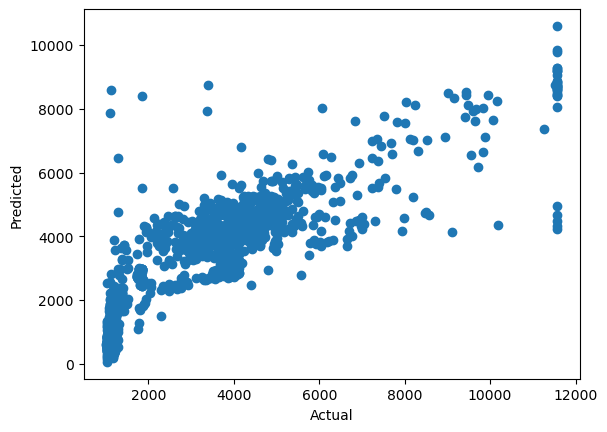

In [76]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

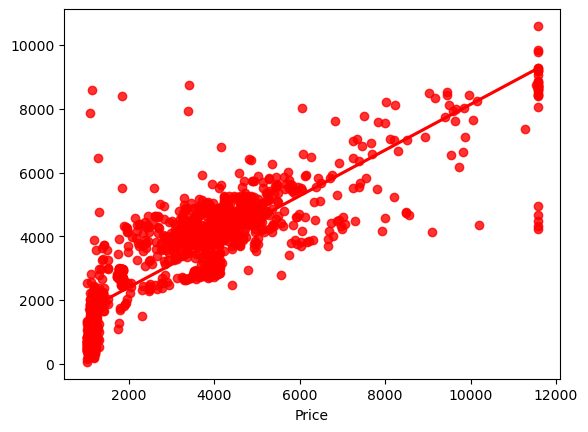

In [77]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [78]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2974,8520.0,7024.994225,1495.005775
1661,1040.0,303.890559,736.109441
3810,4410.0,2481.981613,1928.018387
6137,1230.0,2290.617704,-1060.617704
1278,4660.0,4387.198998,272.801002
...,...,...,...
5032,4900.0,4426.713304,473.286696
4626,1060.0,962.040616,97.959384
4524,4340.0,4856.694735,-516.694735
371,5830.0,5620.773317,209.226683


In [84]:
with open('DiamondPrice.pkl', 'wb') as file:
    pickle.dump(lin_model, file)